<div style="line-height:1.2;">

<h1 style="color:#D68910; margin-bottom: 0.2em;">Scipy basics 4</h1>
<h4 style="margin-top: 0.2em;">Examples with audio signals. Focus on Fourier transformation.</h4>

</div>

<div style="margin-top: 10px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline; margin-bottom: 0;">Keywords:</h3>  scipy.fft + plt.tight_layout() + np.abs() + np.pi
</span>
</div>

In [4]:
import warnings
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from scipy.fft import fft, ifft, fftfreq

<h2 style="color:#D68910"> Example #1 </h2>

Text(0.5, 1.0, 'Original Signal in Time Domain')

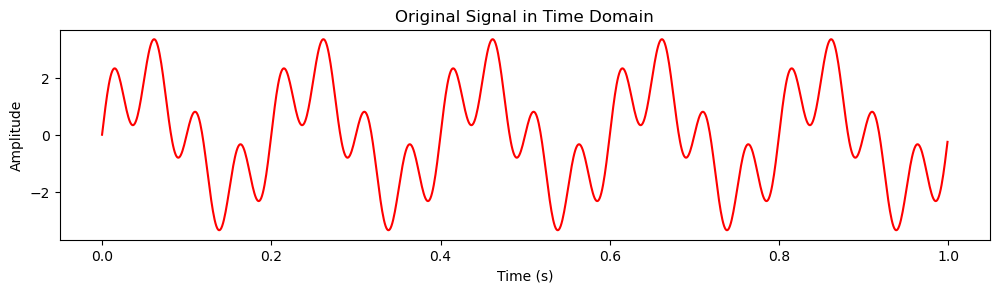

In [2]:
# Sample rate (number of samples per second)
sample_rate = 1000
# Frequencies components [Hz]
freq1, freq2 = 5, 20
# Time axis
t = np.linspace(0, 1, sample_rate, endpoint=False)

# Create a signal with two frequency components
signal = 2 * np.sin(2 * np.pi * freq1 * t) + 1.5 * np.sin(2 * np.pi * freq2 * t)

########## Plot the original signal in the time domain
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal in Time Domain')

Text(0.5, 1.0, 'Magnitude Spectrum (Frequency Domain)')

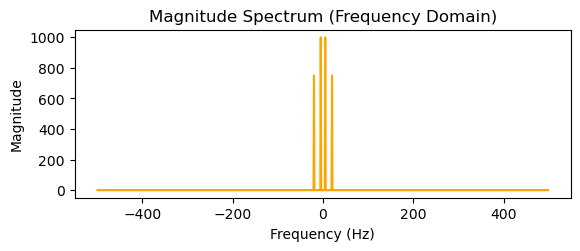

In [3]:
# Perform the Fourier transformation
fourier_transform = fft(signal)

# Get the frequencies corresponding to the Fourier coefficients
frequencies = fftfreq(len(signal), d=1/sample_rate)

######## Plot the magnitude spectrum (amplitude of Fourier coefficients)
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fourier_transform), color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum (Frequency Domain)')

Dominant Frequencies: [  5.  20. -20.  -5.]


Text(0.5, 1.0, 'Filtered Signal in Time Domain')

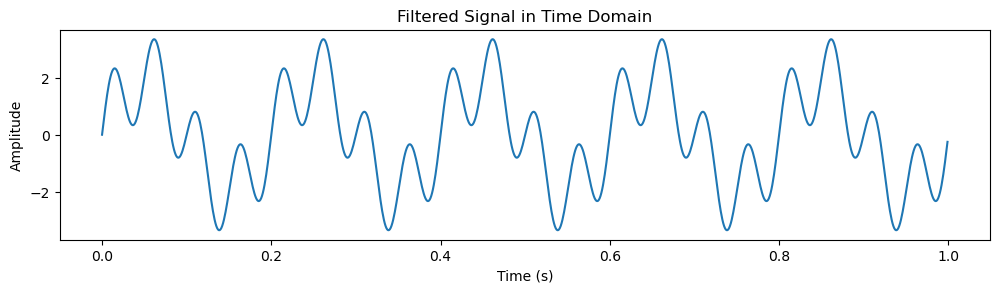

In [4]:
# Identify the dominant frequencies
dominant_frequencies = frequencies[np.abs(fourier_transform) > 100]

# Print the dominant frequencies
print("Dominant Frequencies:", dominant_frequencies)

# Remove high-frequency components (noise) by setting them to zero
filtered_fourier_transform = fourier_transform.copy()
filtered_fourier_transform[np.abs(frequencies) > 50] = 0

# Inverse Fourier transformation to obtain the filtered signal
filtered_signal = ifft(filtered_fourier_transform)

######### Plot the filtered signal in the time domain
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, filtered_signal.real)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal in Time Domain')

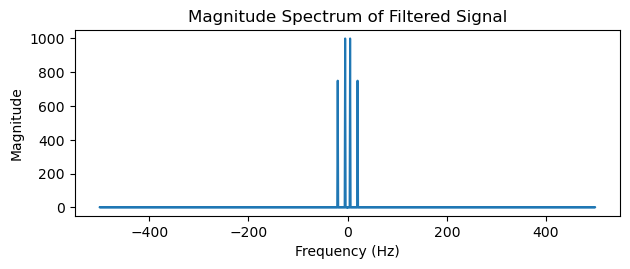

In [5]:
########### Plot the magnitude spectrum of the filtered signal
filtered_frequencies = fftfreq(len(filtered_signal), d=1/sample_rate)
plt.subplot(2, 1, 2)
plt.plot(filtered_frequencies, np.abs(filtered_fourier_transform))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Filtered Signal')

plt.tight_layout()
#plt.show()

<h2 style="color:#D68910"> Example #2 </h2>

Text(0.5, 1.0, 'Original Audio Signal in Time Domain')

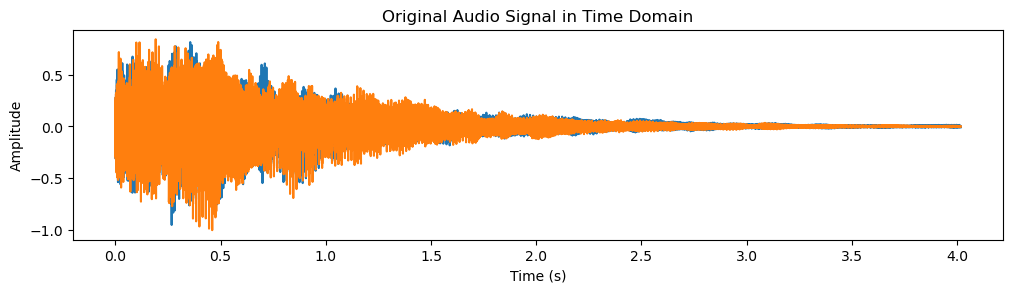

In [6]:
# Load the audio file (wavfile uses NumPy arrays)
sample_rate, audio_data = wavfile.read('/usr/share/sounds/linuxmint-logout.wav')

# Normalize the audio 
audio_data = audio_data / np.max(np.abs(audio_data))

######### Display the original audio signal in the time domain
time = np.arange(len(audio_data)) / sample_rate
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Audio Signal in Time Domain')

Text(0.5, 1.0, 'Original Truncated Audio Signal in Time Domain')

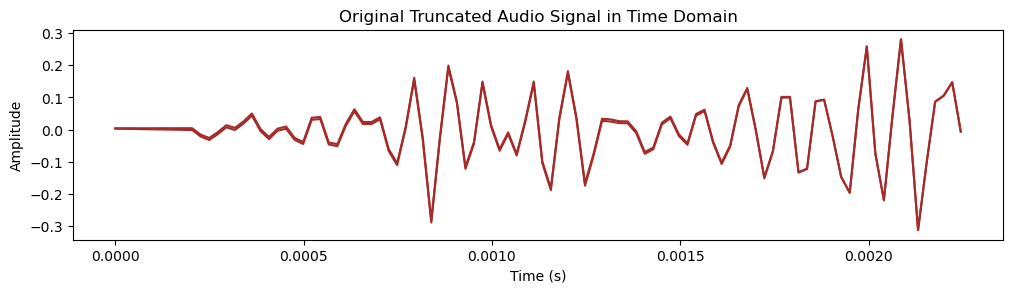

In [29]:
# Take only the first 10000 samples of the audio
audio_data_reduced = audio_data[:100]
# Plot the original audio signal in the time domain
time = np.arange(len(audio_data_reduced)) / sample_rate
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, audio_data_reduced, color='brown')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Truncated Audio Signal in Time Domain')

Shape of frequencies: (100,)
Shape of magnitude: (100,)


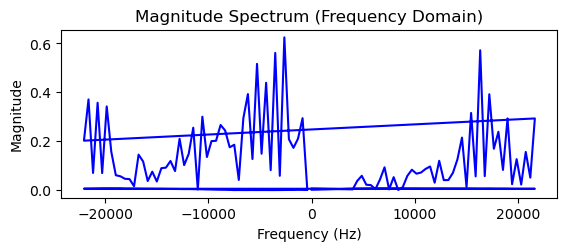

In [8]:
# Perform the Fourier transformation
fourier_transform = fft(audio_data_reduced)

# Calculate the absolute value of the Fourier transform
magnitude = np.abs(fourier_transform)
magnitude = magnitude[:, 1]

# Get the frequencies corresponding to the Fourier coefficients
frequencies = fftfreq(len(audio_data_reduced), d=1/sample_rate)

# Plot the magnitude spectrum (amplitude of Fourier coefficients)
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fourier_transform),color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum (Frequency Domain)')

print("Shape of frequencies:", frequencies.shape)
print("Shape of magnitude:", magnitude.shape)

In [9]:
magnitude

array([1.44908444e-03, 1.77842182e-03, 2.37122909e-03, 2.70056646e-03,
       3.22750626e-03, 3.75444605e-03, 4.28138585e-03, 4.54485575e-03,
       5.33526545e-03, 5.53286787e-03, 5.99394019e-03, 6.19154262e-03,
       6.38914504e-03, 6.58674746e-03, 6.65261494e-03, 6.65261494e-03,
       6.78434989e-03, 6.38914504e-03, 6.71848241e-03, 6.45501251e-03,
       6.71848241e-03, 6.32327757e-03, 6.45501251e-03, 6.38914504e-03,
       6.32327757e-03, 6.19154262e-03, 6.25741009e-03, 6.32327757e-03,
       6.45501251e-03, 6.38914504e-03, 6.25741009e-03, 6.19154262e-03,
       6.19154262e-03, 6.19154262e-03, 6.19154262e-03, 6.25741009e-03,
       6.12567514e-03, 5.92807272e-03, 5.99394019e-03, 6.05980767e-03,
       5.79633777e-03, 5.66460282e-03, 5.79633777e-03, 5.53286787e-03,
       5.33526545e-03, 5.20353050e-03, 5.20353050e-03, 5.26939797e-03,
       5.26939797e-03, 5.40113292e-03, 5.59873534e-03, 5.79633777e-03,
       5.92807272e-03, 6.19154262e-03, 6.52087999e-03, 6.52087999e-03,
      

In [10]:
# Filter the dominant frequencies using a threshold (e.g., 100)
threshold = 0.003
dominant_frequencies = frequencies[magnitude > threshold]

# Show the dominant frequencies
print("Dominant Frequencies:", dominant_frequencies)

Dominant Frequencies: [  1764.   2205.   2646.   3087.   3528.   3969.   4410.   4851.   5292.
   5733.   6174.   6615.   7056.   7497.   7938.   8379.   8820.   9261.
   9702.  10143.  10584.  11025.  11466.  11907.  12348.  12789.  13230.
  13671.  14112.  14553.  14994.  15435.  15876.  16317.  16758.  17199.
  17640.  18081.  18522.  18963.  19404.  19845.  20286.  20727.  21168.
  21609. -22050. -21609. -21168. -20727. -20286. -19845. -19404. -18963.
 -18522. -18081. -17640. -17199. -16758. -16317. -15876. -15435. -14994.
 -14553. -14112. -13671. -13230. -12789. -12348. -11907. -11466. -11025.
 -10584.]


In [11]:
# Manipulate the audio by shifting the frequencies
shifted_frequencies = frequencies * 2

# Expand dimensions of shifted_frequencies to match the shape of fourier_transform
shifted_frequencies = np.expand_dims(shifted_frequencies, axis=1)

In [12]:
len(shifted_frequencies)

100

In [14]:
# Manipulate the audio by shifting the frequencies
shifted_frequencies = frequencies * 2

# Reshape arrays for element-wise multiplication
shifted_frequencies = shifted_frequencies[:, np.newaxis] 
# Fix time shape to perform multiplication
time = time[:, np.newaxis]

# New Fourier transform with the shifted frequencies, performing the element-wise multiplication with broadcasting
shifted_fourier_transform = fourier_transform * np.exp(1j * 2 * np.pi * shifted_frequencies * time)

# Inverse Fourier transformation to obtain the manipulated (reduced) audio signal
manipulated_audio_data = ifft(shifted_fourier_transform).real

In [ ]:
# Save the manipulated audio as a new WAV file
wavfile.write('./data/manipulated_audio.wav', sample_rate, manipulated_audio_data.astype(np.int16))

Text(0.5, 1.0, 'Manipulated Audio Signal in Time Domain')

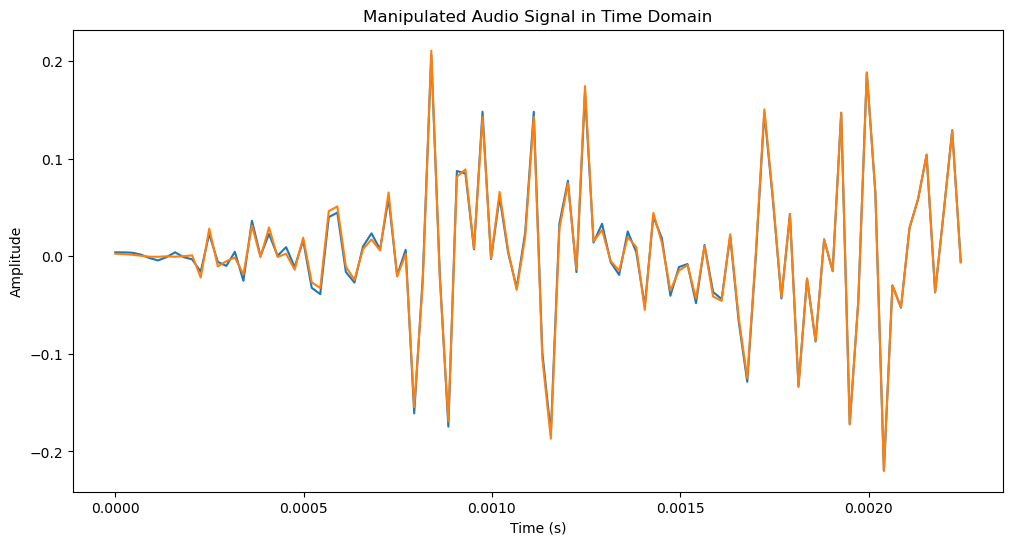

In [27]:
# Plot the manipulated audio signal in the time domain
plt.figure(figsize=(12, 6))
plt.plot(time, manipulated_audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Manipulated Audio Signal in Time Domain')

# Minimize the overlap between subplots, labels, titles legends, etc... when adjusting spacings. 
# It only affects the spacing between subplots, not the size of the subplots themselves.
plt.tight_layout()
#plt.show()

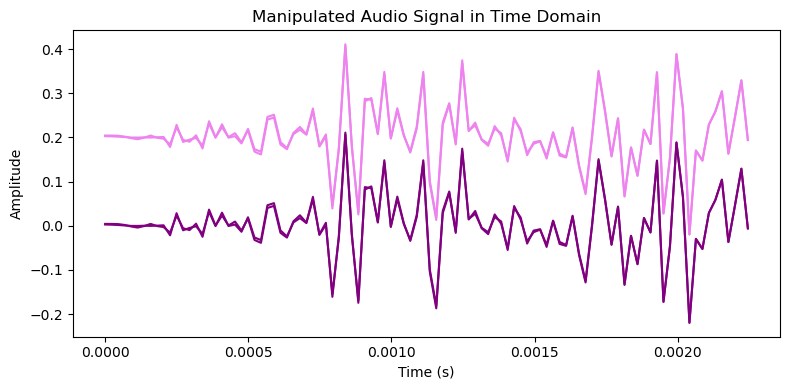

In [26]:
""" Visualize the signals
N.B.
colors = ['blue','orange'] cannot be passed as a list, it is not suppurted. It is necessary to use 2 separated plot methods """
plt.figure(figsize=(8, 4))
plt.plot(time, manipulated_audio_data, color='purple', label='Line 1')
plt.plot(time, manipulated_audio_data + 0.2, color='violet', label='Line 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Manipulated Audio Signal in Time Domain')

plt.tight_layout()

<h2 style="color:#D68910"> Example #3 </h2>

In [ ]:
sample_quiet0 = [0.22, 0.21, 0.21, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22]
sample_quiet1 = [0.19, 0.19, 0.20, 0.19, 0.20, 0.19, 0.20, 0.20, 0.19, 0.20]
sample_quiet2 = [0.26, 0.27, 0.27, 0.26, 0.27, 0.27, 0.27, 0.27, 0.27, 0.26]
sample_quiet3 = [0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.22, 0.23, 0.23, 0.23]
sample_quiet4 = [0.22, 0.23, 0.23, 0.22, 0.22, 0.23, 0.23, 0.23, 0.22, 0.23]

gyro_quiet_l = [52, 53, 47, 47, 51, 50, 48, 53, 49, 49]
gyro_quiet_r = [-152, -151, -152, -154, -151, -153, -153, -153, -150, -152]
#####################################################################
sample_caress0 = [0.22, 0.22, 0.21, 0.22, 0.21, 0.22, 0.22, 0.22, 0.21, 0.22]
sample_caress1 = [0.20, 0.20, 0.20, 0.21, 0.19, 0.20, 0.20, 0.20, 0.20, 0.20]
sample_caress2 = [0.28, 0.28, 0.29, 0.28, 0.28, 0.29, 0.28, 0.28, 0.28, 0.29]
sample_caress3 = [0.23, 0.23, 0.22, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23]
sample_caress4 = [0.22, 0.21, 0.22, 0.21, 0.21, 0.21, 0.22, 0.21, 0.22, 0.21]

gyro_caress_l = [37, 41, -5, 42, 52, 43, 70, 47, 42, 55]
gyro_caress_r = [-158, -150, -190, -154, -134, -152, -121, -147, -144, -132]
#####################################################################
sample_touch0 = [0.23, 0.24, 0.24, 0.23, 0.24, 0.23, 0.24, 0.24, 0.23, 0.24]
sample_touch1 = [0.20, 0.20, 0.20, 0.20, 0.21, 0.20, 0.20, 0.21, 0.21, 0.20]
sample_touch2 = [0.31, 0.31, 0.31, 0.30, 0.30, 0.31, 0.31, 0.31, 0.31, 0.31]
sample_touch3 = [0.22, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.22, 0.23, 0.23]
sample_touch4 = [0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.23, 0.22, 0.22]

gyro_touch_l = [49, 49, 48, 49, 43, 48, 49, 48, 47, 49]
gyro_touch_r = [-151, -152, -146, -149, -155, -150, -150, -153, -149, -152]
#####################################################################
sample_hug0 = [0.38, 0.38, 0.38, 0.37, 0.38, 0.38, 0.38, 0.40, 0.39, 0.39]
sample_hug1 = [0.25, 0.25, 0.25, 0.26, 0.24, 0.25, 0.25, 0.25, 0.24, 0.25]
sample_hug2 = [0.38, 0.37, 0.38, 0.38, 0.37, 0.37, 0.38, 0.37, 0.37, 0.38]
sample_hug3 = [0.28, 0.28, 0.28, 0.27, 0.28, 0.27, 0.28, 0.27, 0.27, 0.27]
sample_hug4 = [0.30, 0.30, 0.29, 0.30, 0.29, 0.29, 0.30, 0.30, 0.31, 0.30]

gyro_hug_l = [43, 42, 40, 44, 45, 41, 40, 43, 38, 43]
gyro_hug_r = [-149, -152, -155, -151, -154, -154, -152, -150, -150, -154]
#####################################################################
sample_choke0 = [0.60, 0.59, 0.57, 0.57, 0.56, 0.55, 0.55, 0.54, 0.54, 0.52]
sample_choke1 = [0.31, 0.31, 0.30, 0.30, 0.30, 0.30, 0.30, 0.29, 0.29, 0.29]
sample_choke2 = [0.48, 0.48, 0.48, 0.47, 0.46, 0.46, 0.46, 0.46, 0.46, 0.45]
sample_choke3 = [0.53, 0.54, 0.52, 0.55, 0.53, 0.57, 0.61, 0.59, 0.51, 0.46]
sample_choke4 = [0.40, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.38, 0.38, 0.37]

gyro_choke_l = [50, 49, 40, 47, 42, 43, 47, 44, 45, 44]
gyro_choke_r = [-153, -151, -154, -151, -154, -152, -152, -154, -152, -152]
#####################################################################
sample_squeeze0 = [0.29, 0.22, 0.22, 0.22, 0.23, 0.21, 0.22, 0.29, 0.23, 0.21]
sample_squeeze1 = [0.30, 0.22, 0.22, 0.27, 0.23, 0.21, 0.21, 0.27, 0.22, 0.21] 
sample_squeeze2 = [0.27, 0.27, 0.26, 0.28, 0.26, 0.27, 0.26, 0.28, 0.26, 0.26] 
sample_squeeze3 = [0.27, 0.23, 0.23, 0.27, 0.24, 0.23, 0.23, 0.28, 0.25, 0.23] 
sample_squeeze4 = [0.23, 0.22, 0.21, 0.22, 0.22, 0.22, 0.21, 0.23, 0.22, 0.22] 


gyro_squeeze_l = [23, 39, 67, 87, -22, -136, 100, 83, 56, -70]
gyro_squeeze_r = [-197, -174, -77, -155, -239, -440, -109, -351, -133, -175]
#####################################################################
sample_shove0 = [0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.21, 0.22]
sample_shove1 = [0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.21, 0.20, 0.21]
sample_shove2 = [0.28, 0.28, 0.27, 0.28, 0.28, 0.27, 0.28, 0.28, 0.28, 0.28]
sample_shove3 = [0.23, 0.23, 0.23, 0.23, 0.23, 0.22, 0.23, 0.23, 0.23, 0.23]
sample_shove4 = [0.23, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.23, 0.24]

gyro_shove_l = [65, -120, 94, 48, 51, 54, 54, 51, 48, 47]
gyro_shove_r = [-128, -454, -100, -157, -150, -150, -152, -152, -151, -152]
#####################################################################
sample_hit0 = [0.22, 0.34, 0.34, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22]
sample_hit1 = [0.21, 0.25, 0.24, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21]
sample_hit2 = [0.28, 0.43, 0.44, 0.26, 0.27, 0.28, 0.27, 0.27, 0.27, 0.27]
sample_hit3 = [0.24, 0.28, 0.29, 0.24, 0.23, 0.24, 0.23, 0.23, 0.23, 0.24]
sample_hit4 = [0.22, 0.27, 0.26, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22]

gyro_hit_l = [15, 59, -48, 55, 59, 56, 55, 52, 50, 55]
gyro_hit_r = [-188, -167, -234, -154, -155, -151, -152, -151, -151, -151]

In [ ]:
y_qu = fft(sample_quiet3)
y_ca = fft(sample_caress3)
y_to = fft(sample_touch3)
y_hu = fft(sample_hug3)
y_ch = fft(sample_choke3)
y_sh = fft(sample_shove3)
y_sq = fft(sample_squeeze3)
y_hi = fft(sample_hit3)


print(y_qu)
print(y_ca)
print(y_to)
print(y_hu)
print(y_ch)
print(y_sh)
print(y_sq)
print(y_hi)

In [ ]:
yinv_qu = ifft(y)
yinv_ca = ifft(y)
yinv_to = ifft(y)
yinv_hu = ifft(y)
yinv_ch = ifft(y)
yinv_sh = ifft(y)
yinv_sq = ifft(y)
yinv_hi = ifft(y)

print(yinv_qu)
print(yinv_ca)
print(yinv_to)
print(yinv_hu)
print(yinv_ch)
print(yinv_sh)
print(yinv_sq)
print(yinv_hi)

In [ ]:
fig1 = plt.figure(1)

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
fig1.suptitle('10 samples of touches MPX sensor 3', fontsize=16)
plt.plot(y_qu, label="Quiet ", color='r', linewidth=2.5)
plt.plot(y_ca, label="Caress", color='b', linewidth=2.5)
plt.plot(y_to, label="Touch", color='lime', linewidth=2.5)
plt.plot(y_hu, label="Hug",  color='c', linewidth=2.5)
plt.plot(y_ch, label="Choke",  color='orange', linewidth=2.5)
plt.plot(y_sq, label="Squeeze",  color='m', linewidth=2.5)
plt.plot(y_sh, label='Shove', color='indigo', linewidth=2.5)
plt.plot(y_hi, label="Hit",  color='k', linewidth=2.5)
plt.grid(True)
plt.xlabel("readings")
plt.ylabel("pressure (psi)")
l1 = plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
#plt.tight_layout()
#plt.savefig('./fourier_image_3.png')
plt.show()

In [5]:
def fftPlot(sig, dt=None, plot=True):
    """ Compute and plot the Fast Fourier Transform (FFT) of a signal.

    Parameters:
        - sig: The input signal [array]
        - dt : The time step (sampling interval) between signal points [float, optional]. 
        - plot : Whether to create and display an FFT plot. Default is True [bool, optional].

    Returns:
        - FFT of the signal on the positive side of the frequency axis
        - Corresponding frequency values for the positive side of the frequency axis

    Details:
        If the signal length is odd, a warning is issued, and the last element is removed from the signal and time values \
        for compatibility with FFT computations.

        The FFT plot displays the magnitude of the analytic FFT on the positive side of the frequency axis.
    """

    # Check if dt (time step) is provided, if not, set it to 1
    if dt is None:
        dt = 1
        t = np.arange(0, sig.shape[-1])
        # Label for the x-axis in the plot
        xLabel = 'samples'  
    else:
        # Calculate time values based on the provided time step (dt)
        t = np.arange(0, sig.shape[-1]) * dt
        # Label for the x-axis in the plot
        xLabel = 'freq [Hz]'  

    # Check if the signal length is odd and issue a warning
    if sig.shape[0] % 2 != 0:
        warnings.warn("signal preferred to be even in size, autoFixing it...")
        # Remove the last element from time (t) and the signal (sig)
        t = t[0:-1]
        sig = sig[0:-1]
    
    # Compute the Fast Fourier Transform (FFT) of the signal and normalize it (dividing by size t for coherent magnitude)
    sigFFT = np.fft.fft(sig) / t.shape[0]  

    # Compute the frequency values corresponding to the FFT
    freq = np.fft.fftfreq(t.shape[0], d=dt)

    # Determine the index where the frequency becomes negative
    firstNegInd = np.argmax(freq < 0)

    # Extract the positive side of the frequency axis and the FFT values, (multiplying by 2 due to the magnitude of analytic signal)
    freqAxisPos = freq[0:firstNegInd]
    sigFFTPos = 2 * sigFFT[0:firstNegInd]  
    if plot:
        ###### Create and display the FFT plot
        plt.figure()
        plt.plot(freqAxisPos, np.abs(sigFFTPos))
        plt.xlabel(xLabel)
        plt.ylabel('mag')  
        plt.title('Analytic FFT plot')
        plt.show()

    return sigFFTPos, freqAxisPos

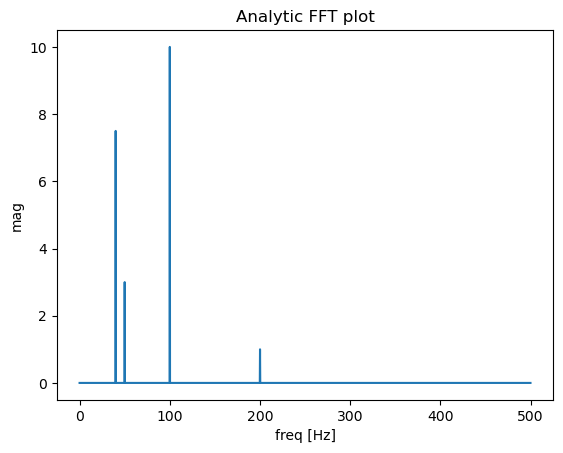

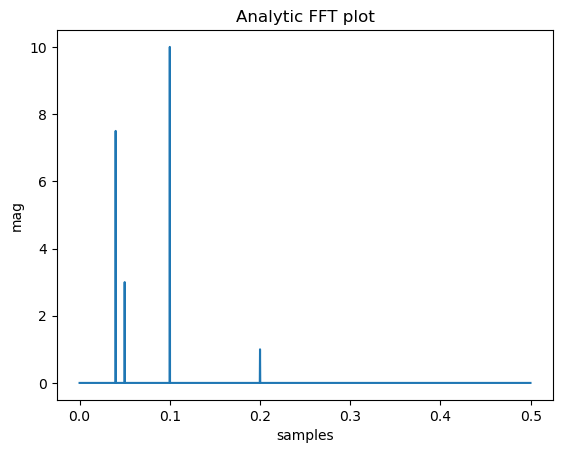

In [11]:
dt = 1 / 1000
# Create a time vector from 0 to 4 seconds with the specified time step
t = np.arange(0, 4, dt)  
f0 = 200  # [Hz]
sig = 1 * np.sin(2 * np.pi * f0 * t) + \
    10 * np.sin(2 * np.pi * f0 / 2 * t) + \
    3 * np.sin(2 * np.pi * f0 / 4 * t) +\
    7.5 * np.sin(2 * np.pi * f0 / 5 * t)

sigFFT, freqAxis = fftPlot(sig, dt=dt)

In [ ]:
dt = 1 / 1000
t = np.arange(0, 1 + dt, dt)
t